In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
from port_opt import fetch, expected_returns, risk_models, plotting
import pandas as pd
import numpy as np

In [3]:
tickers = [
    "AAPL", "AMD", "AMZN", "BABA", "BAC", "BBY", "GE", "GM",
    "GOOG", "JPM", "MA", "META", "PFE", "RRC", "SBUX", "T",
    "UAA", "WMT", "XOM"
]
data = fetch.get_stock_data(tickers,"2018-01-01","2022-01-01")

/Users/wenyuc/Dev/QuantDev/portfolio_opt/port_opt/fetch.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  19 of 19 completed


In [4]:
print(data)

Ticker            AAPL         AMD        AMZN        BABA        BAC  \
Date                                                                    
2018-01-02   40.381008   10.980000   59.450500  174.411484  24.905535   
2018-01-03   40.373959   11.550000   60.209999  174.743881  24.822235   
2018-01-04   40.561497   12.120000   60.479500  176.367874  25.147095   
2018-01-05   41.023293   11.880000   61.457001  181.106842  25.263708   
2018-01-08   40.870934   12.280000   62.343498  180.755463  25.088785   
...                ...         ...         ...         ...        ...   
2021-12-27  176.796036  154.360001  169.669495  110.724937  40.532707   
2021-12-28  175.776428  153.149994  170.660995  109.024986  40.587196   
2021-12-29  175.864670  148.259995  169.201004  106.451309  40.523632   
2021-12-30  174.707794  145.149994  168.644501  116.802986  40.432835   
2021-12-31  174.090149  143.899994  166.716995  112.814270  40.396515   

Ticker            BBY         GE         GM       

In [5]:
past_data, future_data = data.iloc[:-250], data.iloc[-250:]

future_cov = risk_models.sample_cov(future_data)
sample_cov = risk_models.sample_cov(past_data)

In [6]:
import matplotlib.pyplot as plt

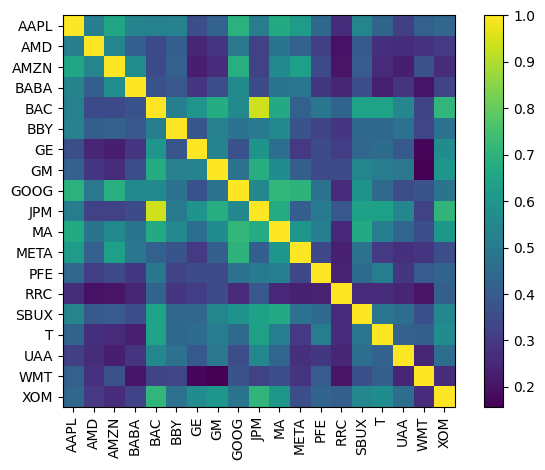

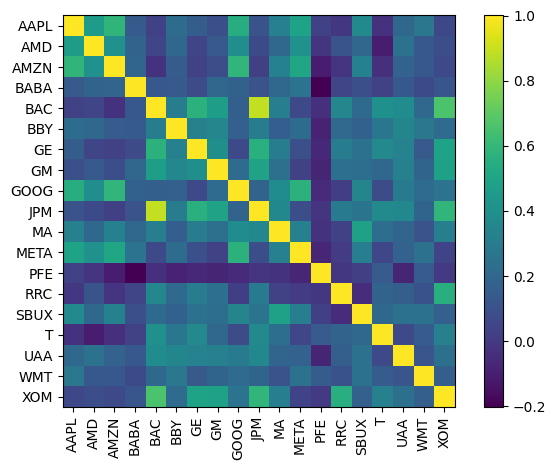

In [7]:
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

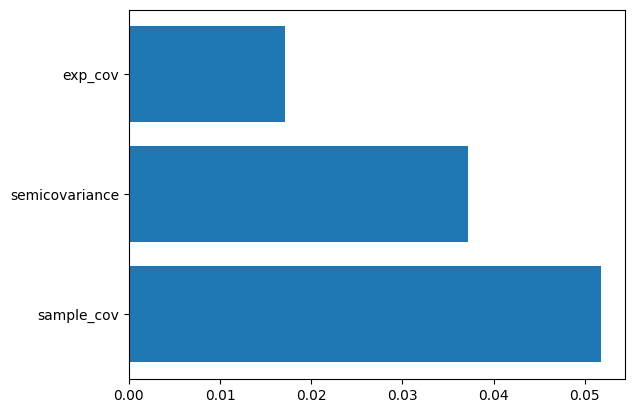

In [8]:
future_variance = np.diag(future_cov)
mean_abs_errors = []
risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov"
]

for method in risk_methods:
    S = risk_models.risk_matrix(data, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

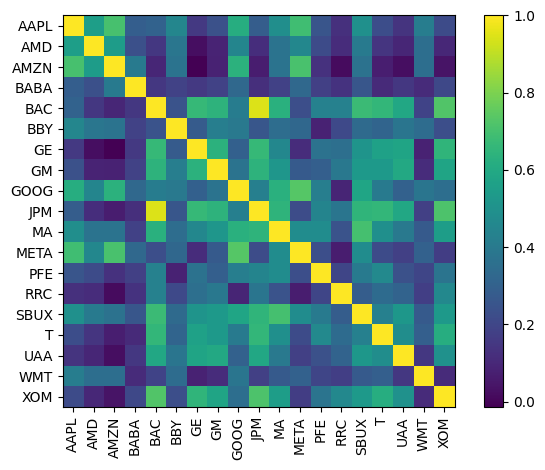

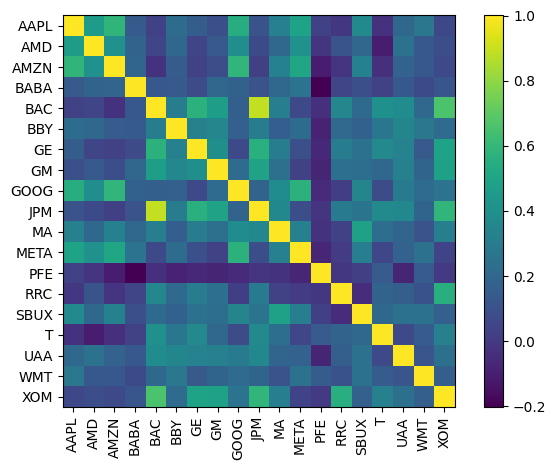

In [10]:
exp_cov = risk_models.exp_cov(past_data)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

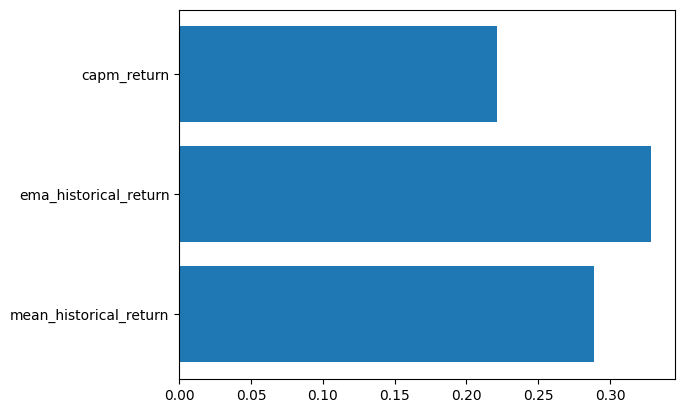

In [12]:
future_rets = expected_returns.mean_historical_return(future_data)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return"
]

for method in return_methods:
    mu = expected_returns.return_model(past_data, method=method)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

In [13]:
print(mean_abs_errors)

[0.289070850362946, 0.32873634349246567, 0.2212394417866843]


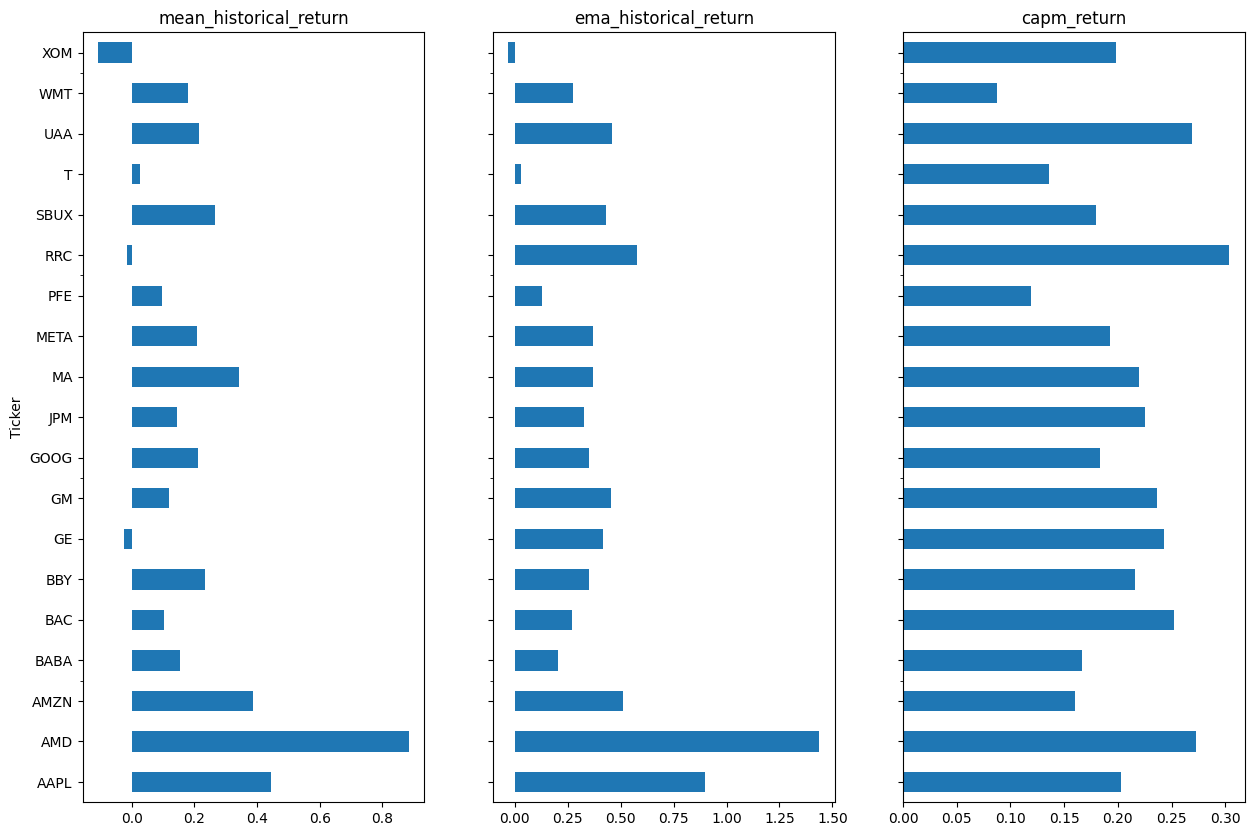

In [15]:
fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_data, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])